# Demo Code of Chapter 3

## Circuit with Quantum Channel

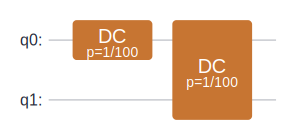

In [1]:
from mindquantum.core.gates import DepolarizingChannel
from mindquantum.core.circuit import Circuit

circ = Circuit()
circ += DepolarizingChannel(0.01).on(0)
circ += DepolarizingChannel(0.01, 2).on([0, 1])
circ.svg()

## Custom arbitrary kraus channel

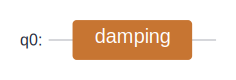

In [2]:
from mindquantum.core.gates import KrausChannel
from mindquantum.core.circuit import Circuit
from cmath import sqrt

gamma = 0.5
kmat0 = [[1, 0], [0, sqrt(1 -gamma)]]
kmat1 = [[0, sqrt(gamma)], [0, 0]]
amplitude_damping = KrausChannel('damping', [kmat0, kmat1])
circ = Circuit()
circ += amplitude_damping.on(0)
circ.svg()

## [ChannelAdder](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.ChannelAdderBase.html)

In MindQuantum, we can use [ChannelAdder](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.ChannelAdderBase.html) to construct noise model.

BitFlipAdder<flip_rate=0.3, with_ctrl=False>


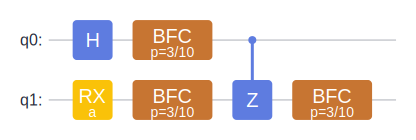

In [3]:
from mindquantum.core.circuit import Circuit, BitFlipAdder

circ = Circuit().h(0).rx('a', 1).z(1, 0)
noise_model = BitFlipAdder(0.3, with_ctrl=False)
noise_circ = noise_model(circ)
print(noise_model)
noise_circ.svg()

## A More Complex Noise Model

In [4]:
from mindquantum.core import *

dc0 = DepolarizingChannel(0.01)
dc1 = DepolarizingChannel(0.02)
dc2 = DepolarizingChannel(0.03)

adder1 = MixerAdder([
    NoiseExcluder(),
    ReverseAdder(MeasureAccepter()),
    QubitNumberConstrain(2),
    NoiseChannelAdder(dc0, focus_on=0),
])
adder2 = MixerAdder([
    NoiseExcluder(),
    ReverseAdder(MeasureAccepter()),
    QubitNumberConstrain(2),
    NoiseChannelAdder(dc1, focus_on=1),
])
adder3 = MixerAdder([
    NoiseExcluder(),
    ReverseAdder(MeasureAccepter()),
    QubitNumberConstrain(2),
    NoiseChannelAdder(dc2, focus_on=2),
])
adder4 = MixerAdder([
    NoiseExcluder(),
    MeasureAccepter(),
    BitFlipAdder(0.01)
], add_after=False)

noise_model = SequentialAdder([
    adder1,
    adder2,
    adder3,
    adder4
])
print(noise_model)

SequentialAdder<
  MixerAdder<
    NoiseExcluder<>
    ReverseAdder<
      MeasureAccepter<>
    >
    QubitNumberConstrain<n_qubits=2, with_ctrl=True>
    NoiseChannelAdder<channel=DC(p=1/100), with_ctrl=True>
  >
  MixerAdder<
    NoiseExcluder<>
    ReverseAdder<
      MeasureAccepter<>
    >
    QubitNumberConstrain<n_qubits=2, with_ctrl=True>
    NoiseChannelAdder<channel=DC(p=1/50), with_ctrl=True>
  >
  MixerAdder<
    NoiseExcluder<>
    ReverseAdder<
      MeasureAccepter<>
    >
    QubitNumberConstrain<n_qubits=2, with_ctrl=True>
    NoiseChannelAdder<channel=DC(p=0.03), with_ctrl=True>
  >
  MixerAdder<
    NoiseExcluder<>
    MeasureAccepter<>
    BitFlipAdder<flip_rate=0.01, with_ctrl=True>
  >
>


Use this noise model to modify a quantum circuit.

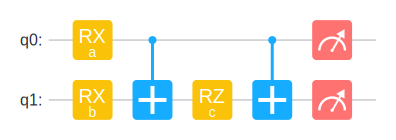

In [5]:
circ = Circuit().rx('a', 0).rx('b', 1).x(1, 0).rz('c', 1).x(1, 0).measure_all()
circ.svg()

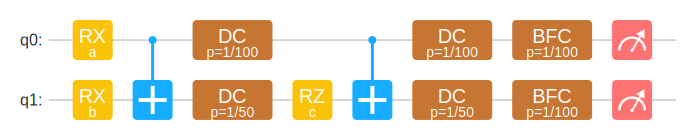

In [6]:
noise_circ = noise_model(circ)
noise_circ.svg()

### Use Noise Model to Construct NoiseSimulator

In MindQuantum, we can also use noise model to directly construct a noise simulator.

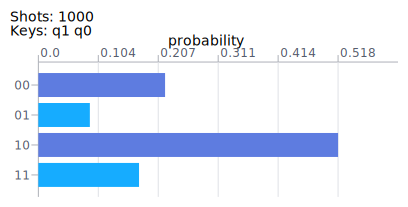

In [10]:
from mindquantum.simulator import Simulator, NoiseBackend

noise_sim = Simulator(NoiseBackend('mqvector', 2, noise_model))
res = noise_sim.sampling(circ, pr={'a': 1, 'b': 2, 'c': 3}, shots=1000)
res.svg()

In [11]:
from mindquantum.utils.show_info import InfoTable

InfoTable('mindquantum', 'numpy')

Software,Version
mindquantum,0.9.0
numpy,1.21.6
System,Info
Python,3.9.13
OS,Linux x86_64
Memory,16.62 GB
CPU Max Thread,16
Date,Wed Jan 10 16:37:05 2024
